In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [34]:
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr


plt.style.use('fivethirtyeight')
%matplotlib inline


df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
for i in df.isna().sum():
    if i != 0:
        print(i)
        
# no output prints meaning no missing values

In [38]:
df1 = df.copy()
df1['DATE'] = pd.to_datetime(df["DATE"],unit='s')
cols = df1['DATE'].values
df1 = pd.DataFrame(data=df1)
df1.set_index('DATE', inplace=True)
df1.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [41]:
df = df1[[ "NASDAQ.AAPL"
, "NASDAQ.ADP"
, "NASDAQ.CBOE"
, "NASDAQ.CSCO"
,"NASDAQ.EBAY"]]

In [42]:
df

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000
...,...,...,...,...,...
2017-08-31 19:56:00,164.1100,106.5650,100.89,32.1850,36.1350
2017-08-31 19:57:00,164.1200,106.5900,100.88,32.2000,36.1300
2017-08-31 19:58:00,164.0100,106.5200,100.86,32.2000,36.1300


c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num fu

<AxesSubplot:xlabel='DATE'>

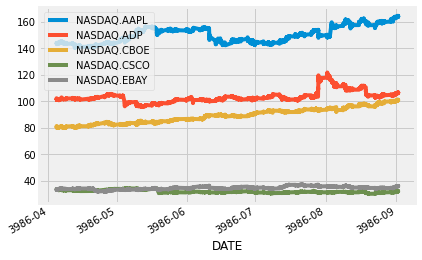

In [43]:
df.plot()

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num fu

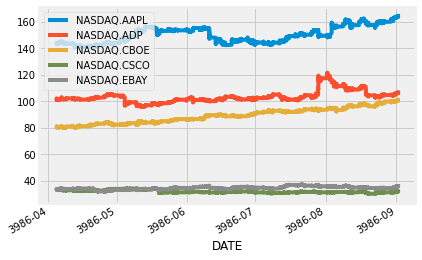

In [45]:
moving_average_df=df.rolling(window=5).mean()  # window: This is the number of observations used for calculating the statistic. 
moving_average_df.plot();

In [49]:
sm.stats.durbin_watson(df) # very less correlation

array([3.85921421e-07, 5.15045512e-07, 2.71132274e-07, 4.41426683e-07,
       4.45419397e-07])

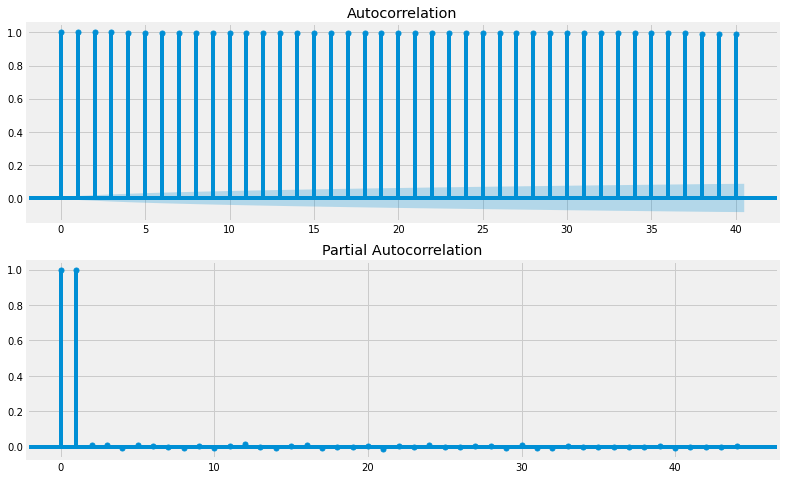

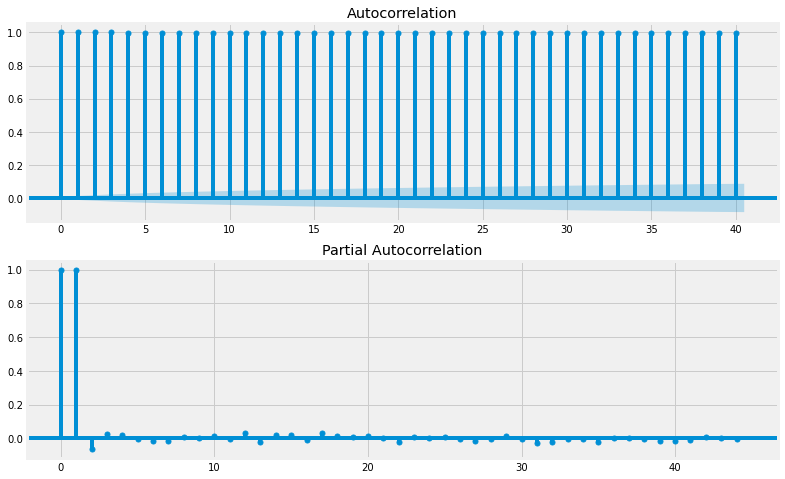

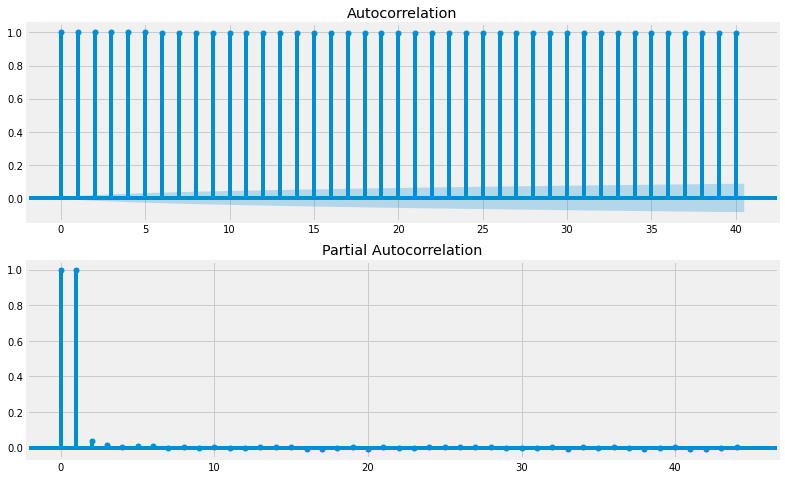

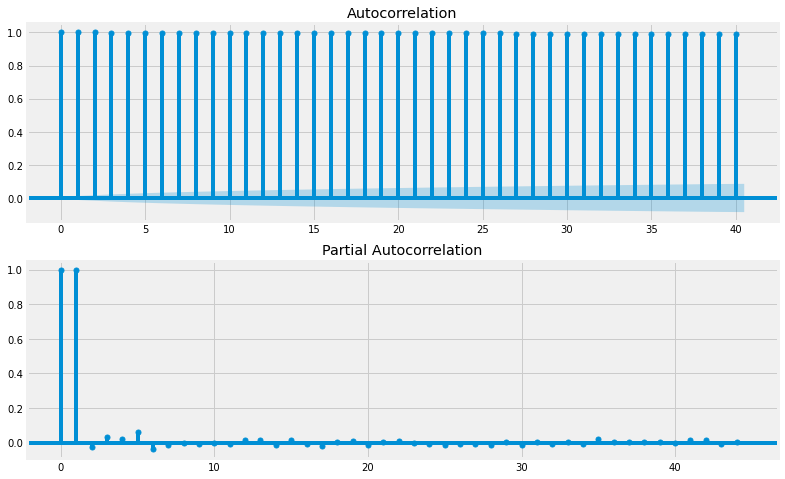

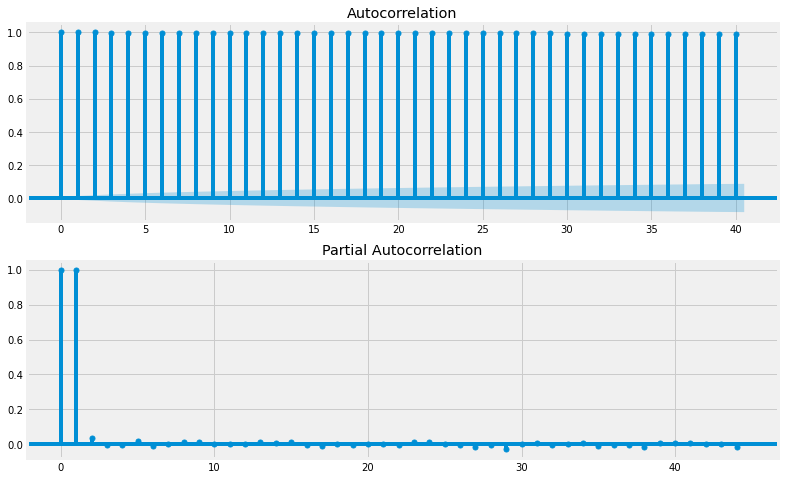

In [63]:
%matplotlib inline
for i in df.columns:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[i].values.squeeze(), lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[i], lags=44, ax=ax2)

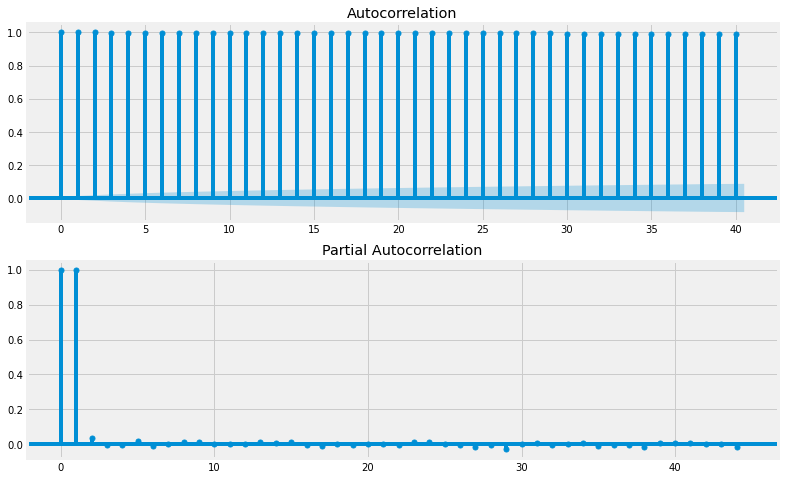

In [62]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.EBAY"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.EBAY"], lags=44, ax=ax2)

In [80]:
mse = []
aic = []
for i in df.columns:
    training_data=df[i][0:35000]
    test_data=df[i][35000:]
    arima= ARIMA(training_data, order=(1,0,0));
    model=arima.fit()
    pred= model.forecast(steps=6266)[0]
    aic.append([str(i), str(model.aic)])
    mse.append([str(i), str(np.sqrt(mean_squared_error(test_data,pred)))]);

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided

### answer

In [81]:
aic

[['NASDAQ.AAPL', '-66240.35563074648'],
 ['NASDAQ.ADP', '-80883.57741916743'],
 ['NASDAQ.CBOE', '-115294.58679761046'],
 ['NASDAQ.CSCO', '-169323.9249140736'],
 ['NASDAQ.EBAY', '-162313.604247718']]

In [79]:
mse

[['NASDAQ.AAPL', '4.034606003838448'],
 ['NASDAQ.ADP', '2.4426269155814415'],
 ['NASDAQ.CBOE', '2.657523052577874'],
 ['NASDAQ.CSCO', '0.7166489855024666'],
 ['NASDAQ.EBAY', '0.6760409416988439']]